In [1]:
import pandas as pd
import geopandas as gpd

# Load hydrography data

In [4]:
hydrography = gpd.read_file("zip://shp_water_dnr_hydrography.zip")

In [5]:
hydrography.head()
for col in hydrography.columns:
    print(col)

fw_id
dowlknum
pw_basin_n
pw_parent_
pw_sub_nam
sub_flag
wb_class
lake_class
acres
shore_mi
center_utm
center_u_1
cty_name
dnr_region
fsh_office
outside_mn
delineated
delineatio
delineat_1
delineat_2
approved_b
approval_d
approval_n
has_flag
flag_type
publish_da
lksdb_basi
has_wld_fl
wld_flag_t
unique_id
created_us
created_da
last_edite
last_edi_1
ow_use
pwi_class
map_displa
map_label
shape_Leng
shape_Area
INSIDE_X
INSIDE_Y
in_lakefin
geometry


In [6]:
print(hydrography.loc[hydrography["wb_class"] == "Lake or Pond"])

        fw_id  dowlknum              pw_basin_n         pw_parent_ pw_sub_nam  \
0           0      None                    None               None       None   
1           0      None                    None               None       None   
2           0      None                    None               None       None   
3           0      None                    None               None       None   
4           0      None                    None               None       None   
...       ...       ...                     ...                ...        ...   
130888      0      None                    None               None       None   
130889      0      None                    None               None       None   
130890      0      None                    None               None       None   
130891      0      None                    None               None       None   
130894   3738  39000200  Lake of the Woods (MN)  Lake of the Woods       None   

       sub_flag      wb_cla

# Load 7 county metro

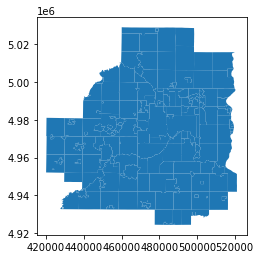

In [2]:
metro = gpd.read_file("zip://shp_bdry_metro_counties_and_ctus.zip")
metro.plot()

In [13]:
metro.head()

,COCTU_ID,COCTU_CODE,COCTU_DESC,CO_CODE,CO_NAME,CTU_ID,CTU_ID_CEN,CTU_CODE,CTU_NAME,COMCD_CENS,Shape_Leng,Shape_Area,geometry
0,00302393954,00301486,Andover,003,Anoka,2393954,02393954,01486,Andover,3004,46098.461917,9.020958e+07,"POLYGON ((479193.630 5016102.367, 479194.468 5..."
1,00302393964,00301720,Anoka,003,Anoka,2393964,02393964,01720,Anoka,3005,24026.015964,1.842920e+07,"POLYGON ((471924.925 5006595.650, 471909.815 5..."
2,00302394156,00305554,Bethel,003,Anoka,2394156,02394156,05554,Bethel,3015,7336.748062,2.698777e+06,"POLYGON ((479231.317 5026949.979, 478981.607 5..."
3,00302394183,00306382,Blaine (Anoka Co. part),003,Anoka,2394183,02394183,06382,Blaine,3020,47569.404746,8.764915e+07,"POLYGON ((485928.451 4999192.195, 486331.695 4..."
4,00302393784,00310648,Centerville,003,Anoka,2393784,02393784,10648,Centerville,3030,12856.740310,6.311614e+06,"POLYGON ((496790.693 5001960.495, 496794.538 5..."


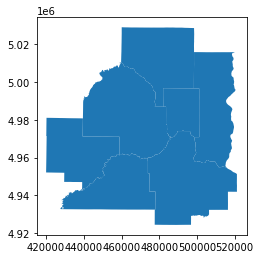

In [14]:
metro_dissolve = metro.dissolve(by = "CO_NAME")
metro_dissolve.plot()

In [16]:
metro_dissolve.is_valid

CO_NAME
Anoka         True
Carver        True
Dakota        True
Hennepin      True
Ramsey        True
Scott         True
Washington    True
dtype: bool

# Clip hydro to metro

In [17]:
# Varifying the projections
print(metro_dissolve.crs)
print(hydrography.crs)

epsg:26915
epsg:26915


In [19]:
# Checking for invalid polygon geometries since the clip operation did not work
for i in hydrography.is_valid:
    if i == False:
        print("poly is false")

poly is false
poly is false
poly is false
poly is false
poly is false
poly is false
poly is false
poly is false
poly is false
poly is false
poly is false
poly is false
poly is false
poly is false
poly is false
poly is false
poly is false
poly is false
poly is false
poly is false
poly is false
poly is false
poly is false
poly is false
poly is false
poly is false
poly is false
poly is false
poly is false
poly is false
poly is false
poly is false
poly is false
poly is false
poly is false
poly is false
poly is false
poly is false
poly is false
poly is false
poly is false
poly is false
poly is false
poly is false
poly is false
poly is false
poly is false
poly is false
poly is false
poly is false
poly is false
poly is false
poly is false
poly is false
poly is false
poly is false
poly is false


In [27]:
# https://stackoverflow.com/questions/63955752/topologicalerror-the-operation-geosintersection-r-could-not-be-performed
hydro_valid = hydrography.buffer(0)

ValueError: Unknown geometry type: featurecollection

In [21]:
# Checking for invalid polygon geometries since the clip operation did not work
for i in hydro_valid.is_valid:
    if i == False:
        print("poly is false")

In [26]:
hydro_valid.head()

0    POLYGON ((265662.815 4847203.927, 265669.855 4...
1    POLYGON ((244609.451 4847549.609, 244612.858 4...
2    POLYGON ((248481.510 4851642.041, 248484.829 4...
3    POLYGON ((237784.737 4851545.927, 237786.077 4...
4    POLYGON ((246118.094 4832971.221, 246119.899 4...
dtype: geometry

In [22]:
hydro_clip = gpd.clip(hydro_valid, metro_dissolve)

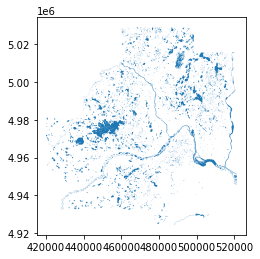

In [23]:
hydro_clip.plot()

In [25]:
hydro_clip.head()

#hydro_lake = hydro_clip.loc[hydro_clip["wb_class"] == "Lake or Pond"]
#hydro_lake.plot()

11010    POLYGON ((496245.416 4939651.635, 496236.136 4...
11011    POLYGON ((483663.086 4931478.403, 483667.590 4...
11029    POLYGON ((478374.781 4939101.478, 478375.441 4...
11036    POLYGON ((502501.062 4940083.279, 502489.412 4...
11048    POLYGON ((483236.733 4935496.847, 483245.873 4...
Name: geometry, dtype: geometry

# Load 2014, 2016, 2018 water files

In [ ]:
water2018 = gpd.read_file("zip://impaired_2018_lakes.zip")
water2016 = gpd.read_file("zip://impaired_2016_lakes.zip")
water2014 = gpd.read_file("zip://impaired_2014_lakes.zip")

In [ ]:
water2018.plot()

In [ ]:
for col in water2018.columns:
    print(col)

In [ ]:
water2018 = water2018.drop(["CAT", "CAT_DESC", "REACH_DESC", "AREA_ACRES", "AFFECTED_U", "LIKE_MEET", "NON_POLL", 
                "NAT_BACK", "ADD_MON", "APPROVED", "NEEDS_PLN", "NEW_IMPAIR", "HUC_8", "HUC_8_NAME", "HUC_4", "BASIN", 
                "COUNTY", "TRIBAL_INT", "INDIAN_RES", "AMMONIA", "CHLORIDE", "FISHESBIO", "HG_F", "HG_W", 
                "NUTRIENTS", "PCB_F", "PFOS_F", "Shape_Leng", "Shape_Area"], axis = 1)


In [ ]:
water2018

In [ ]:
for col in water2016.columns:
    print(col)

In [ ]:
water2016.drop(["CAT", "DATASET_NA", "REACH_DESC", "AREA_ACRES", "AFFECTED_U", "TMDL_NOT_R", "TMDL_NOT_1", "IMPAIR_P_1", "NEW_IMPAIR", "NEW_IMPA_1", 
                "TMDL_APPRO", "TMDL_APP_1", "TMDL_NEEDE", "TMDL_NEE_1", "HUC_8", "HUC_8_NAME", "HUC_4", 
                "BASIN", "COUNTY", "TRIBAL_INT", "INDIAN_RES", "CHLORIDE", "FISHESBIO", "HG_F", "HG_W", 
                "NUTRIENTS", "PCB_F", "PFOS_F", "SHAPE_Leng", "SHAPE_Area"], axis = 1)

In [ ]:
for col in water2014.columns:
    print(col)

In [ ]:
water2014 = water2014.drop(["LOCATION", "ACRES", "CAT", "AFFECTED_U", "NOPLN", "APPROVED", "NEEDSPLN", "NEW_2014", 
                "HUC8", "HUC8_NAME", "HUC4", "BASIN", "ALL_COUNTI", "WDWMO_NAME", "WDWMO_TYPE", "Chloride", 
                "HgF", "HgW", "Nutrients", "PCBF", "PFOS_W", "SHAPE_Leng", "Shape_Le_1", "Shape_Area"], axis = 1)
water2014

In [ ]:
water2014.rename(columns = {"WATER_NAME" : "NAME"})

# Load water 2020 data csv

In [ ]:
water2020 = gpd.read_file("wq-iw1-65.csv")

In [ ]:
for col in water2020.columns:
    print(col)

In [ ]:
water2020.head()
test = water2020[["Water body name", "AUID", "Water body type", "Use Class", "Pollutant or stressor", "geometry"]]
test

In [ ]:
test2 = test.loc[(test["Water body type"] == "Lake")]
test2

# Trying to remove duplicates

In [ ]:
#join test2 to water2018
# output 1946 rows...there are duplicates...???
jointest = test2.merge(water2018, on = "AUID")

jointest

In [ ]:
test3 = test2.groupby("AUID", as_index = False)["Pollutant or stressor"].apply(";".join)
test3

In [ ]:
#join test3 back to test2

test4 = test2.merge(test3, how = "inner", on = "AUID")
test4

# Load blockgroup data and intersecting it with the water data

In [ ]:
blockgroups_df = gpd.read_file('zip://tl_2019_27_bg.zip')
print(f'Loaded {len(blockgroups_df):,} block groups')

In [ ]:
blockgroups_df.plot()

In [ ]:
print(blockgroups_df.crs)
print(water2018.crs)

In [ ]:
bg_proj = blockgroups_df.to_crs('EPSG:26915')
bg_proj.plot()

In [ ]:
water2018_intersect_bg_proj = gpd.overlay(water2018, bg_proj, how='intersection')
water2018_intersect_bg_proj.plot()
water2018_intersect_bg_proj.head()

In [ ]:
### Code Review Comments ###
# add columns and then remove duplicates again
# find lakes that have been added/removed, and look at the traffic at that spot now
# Smaller scale? Just one city
# function for selecting data with block groups